<a href="https://colab.research.google.com/github/Gustavo-Ros/Simulaci-n-2/blob/main/Proyecto_articulo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MICROSIMULACIÓN

Los ingresos considerados son:


| Concepto      | Min   | Max   | Frecuencia | Distribución |
|---------------|-------|-------|------------|--------------|
| Renta         | 3480  | 3480  | Mensual    | Constante    |
| Aportaciones  | 100   | 300   | Semanal    | Normal       |
| Semana        | 50    | 120   | Semanal    | Normal       |
| Beca          | 6600  | 6600  | Semestral  | Binomial     |
| Rendimiento   | 13    | 14.5  | Anual      | Normal       |


Los gastos considerados son:


| Concepto   | Min   | Max   | Frecuencia | Distribución |
|------------|-------|-------|------------|--------------|
| Pasaje     | 22    | 42    | Diario     | Binomial     |
| Celular    | 269   | 299   | Mensual    | Binomial     |
| Comida     | 36    | 120   | Diario     | Normal       |
| Tdc        | 0     | 500   | Mensual    | Normal       |
| Otros      | 0     | 500   | Mensual    | Normal       |


In [ ]:
import numpy as np
from numpy import random as rnd
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import truncnorm
import seaborn as sns

In [ ]:
def dist_normal(mu, sigma, a, b, size):
    return truncnorm.rvs((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma, size=size)

In [ ]:
def dist_normal2(mu, sigma, a, b, size):
    return np.clip(np.random.normal(mu, sigma, size), a, b)

In [ ]:
#SIMULAR VARIABLES
def sim_var(mu,sigma,a,b):
  lista=[]
  for j in range(1000):
    arreglo=dist_normal2(mu=mu, sigma=sigma, a=a, b=b, size=1000)
    promedio=np.mean(arreglo)
    lista.append(promedio)
  return lista

In [ ]:
def percentiles_mas(arreglo, per):
  arreglo = np.array(arreglo)
  q = np.percentile(arreglo, per)
  valores_q_mas = arreglo[arreglo >= q]
  return valores_q_mas

In [ ]:
def percentiles_menos(arreglo, per):
  arreglo = np.array(arreglo)
  q = np.percentile(arreglo, per)
  valores_q_mas = arreglo[arreglo <= q]
  return valores_q_mas

In [17]:
# VARIABLES ESCENARIO BASE
aportaciones_sim=sim_var(150, 500, 100, 300)
aporte_sem_sim=sim_var(110, 500, 100, 120)
rendimiento_sim=sim_var(13, 10, 12, 15)
beca=np.random.choice([0, 6600], size=1000, p=[0.1, 0.9])
renta=np.random.choice([3480], size=1000, p=[1])
servicio=np.random.choice([1500], size=1000, p=[1])

comida_sim = sim_var(78, 50, 36, 120)
tarjeta_credito_sim = sim_var(400, 500, 300, 500)
otros_sim = sim_var(350, 500, 250, 1000)
pasaje=np.random.choice([22, 42], size=1000, p=[0.1, 0.9])
celular=np.random.choice([269, 299], size=1000, p=[0.1, 0.9])
contador=np.random.choice([350], size=1000, p=[1])

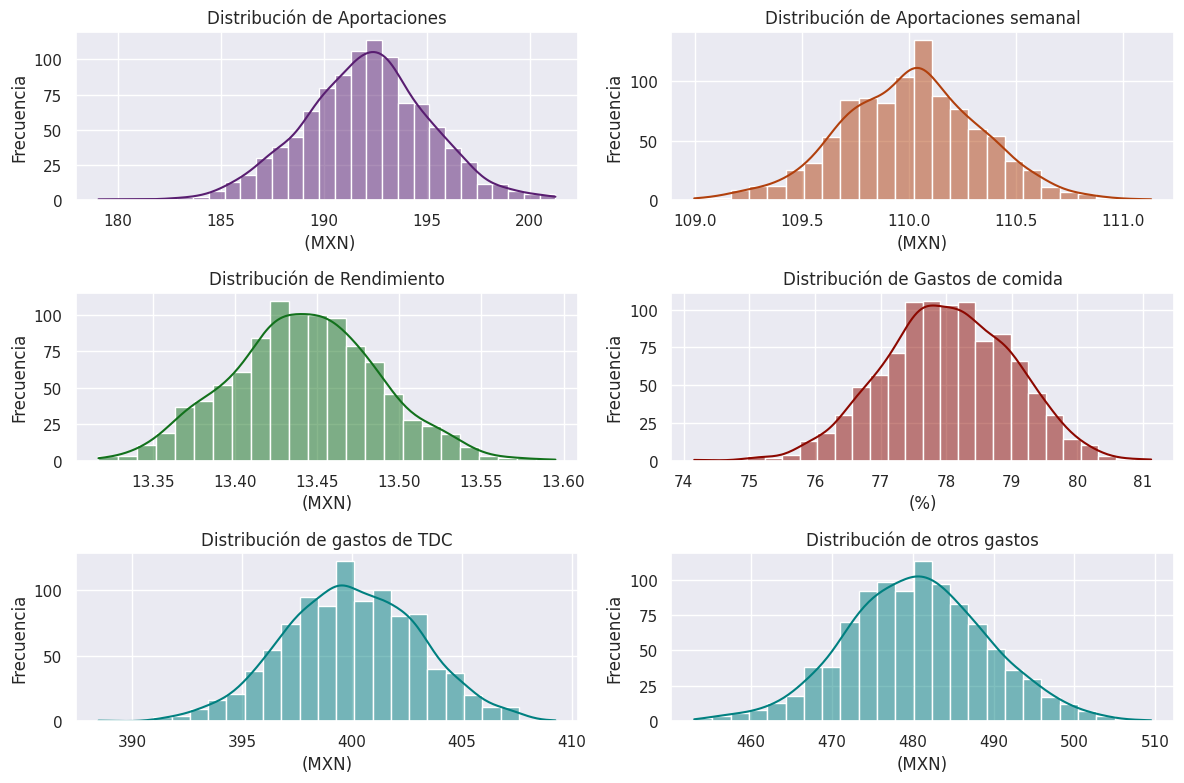

In [ ]:
# Establecer el tema para los gráficos
sns.set_theme(style="darkgrid")

# Crear la figura y los ejes para los histogramas (2 filas, 3 columnas)
fig, axs=plt.subplots(3,2, figsize=(12, 8))


sns.histplot(aportaciones_sim, kde=True, color=sns.color_palette("dark")[4], ax=axs[0, 0])
axs[0, 0].set_title('Distribución de Aportaciones')
axs[0, 0].set_xlabel(' (MXN)')
axs[0, 0].set_ylabel('Frecuencia')

sns.histplot(aporte_sem_sim, kde=True, color=sns.color_palette("dark")[1], ax=axs[0, 1])
axs[0, 1].set_title('Distribución de Aportaciones semanal')
axs[0, 1].set_xlabel('(MXN)')
axs[0, 1].set_ylabel('Frecuencia')

sns.histplot(rendimiento_sim, kde=True, color=sns.color_palette("dark")[2], ax=axs[1,0])
axs[1, 0].set_title('Distribución de Rendimiento')
axs[1, 0].set_xlabel('(MXN)')
axs[1, 0].set_ylabel('Frecuencia')

sns.histplot(comida_sim, kde=True, color=sns.color_palette("dark")[3], ax=axs[1, 1])
axs[1, 1].set_title('Distribución de Gastos de comida')
axs[1, 1].set_xlabel('(%)')
axs[1, 1].set_ylabel('Frecuencia')

sns.histplot(tarjeta_credito_sim, kde=True, color="teal", ax=axs[2,0])
axs[2,0].set_title('Distribución de gastos de TDC')
axs[2,0].set_xlabel('(MXN)')
axs[2,0].set_ylabel('Frecuencia')

sns.histplot(otros_sim, kde=True, color="teal", ax=axs[2,1])
axs[2,1].set_title('Distribución de otros gastos')
axs[2,1].set_xlabel('(MXN)')
axs[2,1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.savefig("histogramas.png", dpi=300, bbox_inches="tight")
plt.show()



In [ ]:
#PERCENTILES
aportaciones_per=percentiles_menos(aportaciones_sim, 25)
aporte_sem_per=percentiles_menos(aporte_sem_sim, 75)
rendimiento_per=percentiles_menos(rendimiento_sim, 25)

comida_per=percentiles_mas(comida_sim, 75)
tarjeta_credito_per=percentiles_mas(tarjeta_credito_sim, 75)
otros_per=percentiles_mas(otros_sim, 75)


In [ ]:
#VARIABLE ESCENARIO ADVERSO

ea_aportaciones_sim = sim_var(abs(100-min(aportaciones_per))/2, 500, 100, min(aportaciones_per))
ea_aporte_sem_sim = sim_var(abs(100-min(aporte_sem_per))/2, 500, 100, min(aporte_sem_per))
ea_rendimiento_sim = sim_var(abs(13-min(rendimiento_per))/2, 500, 13, min(rendimiento_per))

ea_comida_sim = sim_var(abs(max(comida_per)-120)/2, 500, max(comida_per), 120)
ea_tarjeta_credito_sim = sim_var(abs(max(tarjeta_credito_per)- 500)/2, 500, max(tarjeta_credito_per), 500)
ea_otros_sim = sim_var(abs(max(otros_per)-500)/2, 500, max(otros_per), 500)


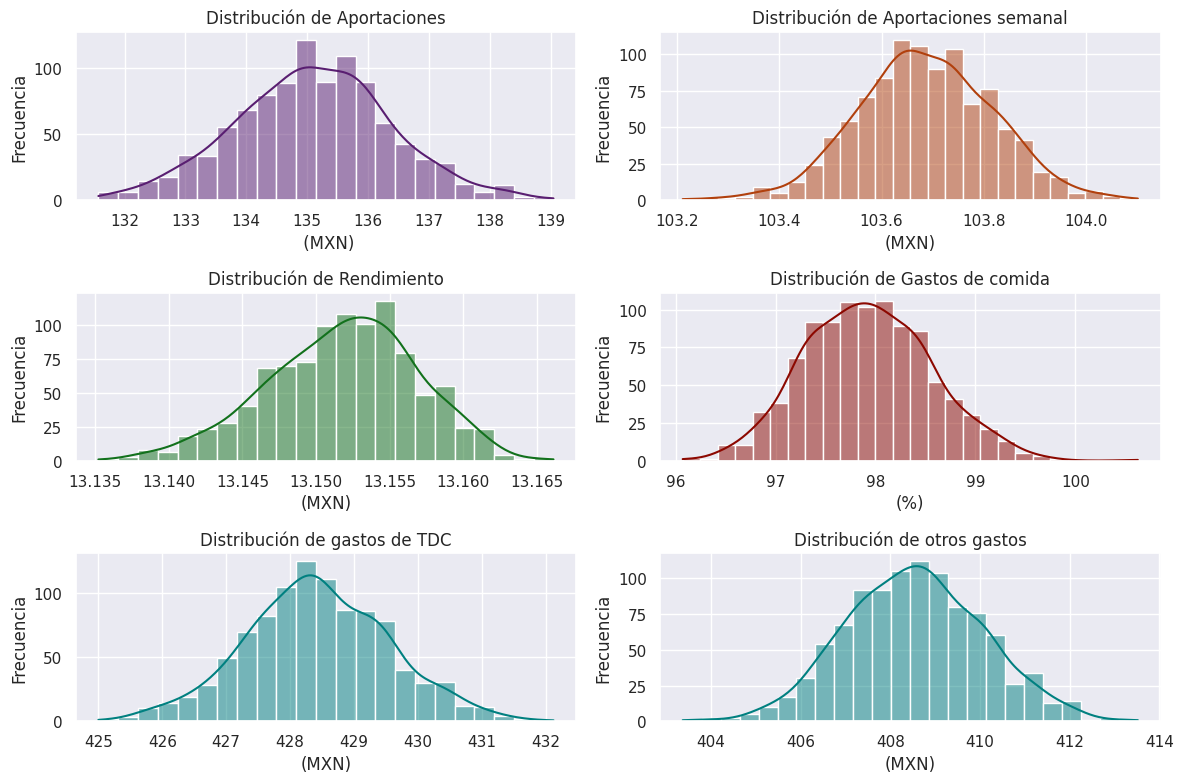

In [ ]:
# Establecer el tema para los gráficos
sns.set_theme(style="darkgrid")

# Crear la figura y los ejes para los histogramas (2 filas, 3 columnas)
fig, axs=plt.subplots(3,2, figsize=(12, 8))


sns.histplot(ea_aportaciones_sim, kde=True, color=sns.color_palette("dark")[4], ax=axs[0, 0])
axs[0, 0].set_title('Distribución de Aportaciones')
axs[0, 0].set_xlabel(' (MXN)')
axs[0, 0].set_ylabel('Frecuencia')

sns.histplot(ea_aporte_sem_sim, kde=True, color=sns.color_palette("dark")[1], ax=axs[0, 1])
axs[0, 1].set_title('Distribución de Aportaciones semanal')
axs[0, 1].set_xlabel('(MXN)')
axs[0, 1].set_ylabel('Frecuencia')

sns.histplot(ea_rendimiento_sim, kde=True, color=sns.color_palette("dark")[2], ax=axs[1,0])
axs[1, 0].set_title('Distribución de Rendimiento')
axs[1, 0].set_xlabel('(MXN)')
axs[1, 0].set_ylabel('Frecuencia')

sns.histplot(ea_comida_sim, kde=True, color=sns.color_palette("dark")[3], ax=axs[1, 1])
axs[1, 1].set_title('Distribución de Gastos de comida')
axs[1, 1].set_xlabel('(%)')
axs[1, 1].set_ylabel('Frecuencia')

sns.histplot(ea_tarjeta_credito_sim, kde=True, color="teal", ax=axs[2,0])
axs[2,0].set_title('Distribución de gastos de TDC')
axs[2,0].set_xlabel('(MXN)')
axs[2,0].set_ylabel('Frecuencia')

sns.histplot(ea_otros_sim, kde=True, color="teal", ax=axs[2,1])
axs[2,1].set_title('Distribución de otros gastos')
axs[2,1].set_xlabel('(MXN)')
axs[2,1].set_ylabel('Frecuencia')

plt.tight_layout()
plt.savefig("histogramas.png", dpi=300, bbox_inches="tight")
plt.show()


DEFINIR ESCENARIO BASE

Ingresos y gastos es condiciones normales (sin variciones)

DEFINIR ESCENARIO ADVERSO

Ingresos
 - La renta solo se cubre 6 meses
 - Las aportaciones solo subren los percentiles <25%
 - Los pasajes solo cubren los porcentiles <75%
 - No hay ingresos de beca
 - El rendimiento cubre el <25%

 - Los pasajes siempre son $42
 - Gasto del celular es binomial
 - Los gastos de comida cubren percentiles >75%
 - El gasto de Tdc cubre percentiles >75%
 - Otros gastos cubren percentiles >75%

In [ ]:
num_dia=[1, 2, 3, 4, 5, 6, 7]
anio=365
fondo=2000

In [ ]:
# ESCENARIO BASE
fondo_inicial=2000
fondo_ev=[]
i=1
for j in range(anio):
  fondo_inicial+=fondo_inicial*rnd.choice(rendimiento_sim)/36500
  if i !=6 or i!=7:
    fondo_inicial-=(rnd.choice(comida_sim)+rnd.choice(pasaje))
  if i==7:
    fondo_inicial+=(rnd.choice(aporte_sem_sim)+rnd.choice(aportaciones_sim))
    i=1
  else:
    i+=1
  if j%30==0:
    fondo_inicial+=rnd.choice(renta-rnd.choice(celular)+servicio)
    fondo_inicial-=(rnd.choice(tarjeta_credito_sim)+rnd.choice(otros_sim)+contador)
  if j==180 or j==360:
    fondo_inicial+=rnd.choice(beca)

  fondo_ev.append(fondo_inicial)
print(fondo_inicial)

[35034.4778486 35034.4778486 35034.4778486 35034.4778486 35034.4778486
 35034.4778486 35034.4778486 35034.4778486 35034.4778486 35034.4778486
 35034.4778486 35034.4778486 35034.4778486 35034.4778486 35034.4778486
 35034.4778486 35034.4778486 35034.4778486 35034.4778486 35034.4778486
 35034.4778486 35034.4778486 35034.4778486 35034.4778486 35034.4778486
 35034.4778486 35034.4778486 35034.4778486 35034.4778486 35034.4778486
 35034.4778486 35034.4778486 35034.4778486 35034.4778486 35034.4778486
 35034.4778486 35034.4778486 35034.4778486 35034.4778486 35034.4778486
 35034.4778486 35034.4778486 35034.4778486 35034.4778486 35034.4778486
 35034.4778486 35034.4778486 35034.4778486 35034.4778486 35034.4778486
 35034.4778486 35034.4778486 35034.4778486 35034.4778486 35034.4778486
 35034.4778486 35034.4778486 35034.4778486 35034.4778486 35034.4778486
 35034.4778486 35034.4778486 35034.4778486 35034.4778486 35034.4778486
 35034.4778486 35034.4778486 35034.4778486 35034.4778486 35034.4778486
 35034

In [ ]:
# https://seaborn.pydata.org/generated/seaborn.lineplot.html


In [ ]:
df = pd.DataFrame({'x_axis': range(0,365),'y_axis': fondo_ev})

In [ ]:
sns.set_theme(style="darkgrid")

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, color=sns.color_palette("dark")[0], label="Evolución del Fondo", x="x_axis", y="y_axis")
#plt.plot(fondo_ev, color='blue', label="Evolución del Fondo")
plt.axhline(y=2000, color="red", linestyle='--', label="Fondo Inicial")
plt.title("Evolución del Fondo a lo Largo del Año")
plt.xlabel("Día")
plt.ylabel("Monto en Fondo")
plt.legend()
plt.grid("True")
plt.show()


ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

<Figure size 1200x600 with 0 Axes>

In [ ]:
# ESCENARIO BASE
def simulacion_fondo(fondo,rendimiento,comida,pasaje,aporte_sem,aportaciones,renta,celular)

fondo=2000
fondo_ev=[]
i=1
for j in range(anio):
  fondo+=fondo*rnd.choice(rendimiento_sim)/36500
  if i !=6 or i!=7:
    fondo-=(rnd.choice(comida_sim)+rnd.choice(pasaje))
  if i==7:
    fondo+=(rnd.choice(aporte_sem_sim)+rnd.choice(aportaciones_sim))
    i=1
  else:
    i+=1
  if j%30==0:
    fondo+=rnd.choice(renta)-rnd.choice(celular)
    fondo-=(rnd.choice(tarjeta_credito_sim)+rnd.choice(otros_sim))
  if j==180 or j==360:
    fondo+=rnd.choice(beca)

  fondo_ev.append(fondo)
fondo

In [ ]:
import pandas as pd

# Parámetros iniciales
fondo_inicial = 10000
aportacion_mensual = 1000
gastos_mensuales = 800
rendimiento_anual = 0.04  # 4%
inflacion_anual = 0.03    # 3%
meses = 24

# Escenarios adversos
rendimiento_crisis = 0.0
inflacion_crisis = 0.06
gasto_extra_mes12 = 5000

# Función de simulación
def microsimulacion(fondo_inicial, aportacion_mensual, gastos_mensuales, rendimiento_anual, inflacion_anual, meses, escenario="base"):
    saldo = fondo_inicial
    historico = []

    for mes in range(1, meses + 1):
        # Ajustar parámetros según escenario
        if escenario == "crisis" and mes == 12:
            gastos_mensuales += gasto_extra_mes12
            rendimiento_anual = rendimiento_crisis
            inflacion_anual = inflacion_crisis

        # Calcular rendimiento mensual
        rendimiento_mensual = saldo * (rendimiento_anual / 12)
        gastos_ajustados = gastos_mensuales * (1 + inflacion_anual / 12)

        # Actualizar saldo
        saldo += aportacion_mensual
        saldo += rendimiento_mensual
        saldo -= gastos_ajustados

        # Guardar datos del mes
        historico.append({
            "Mes": mes,
            "Saldo": saldo,
            "Rendimiento": rendimiento_mensual,
            "Gastos": gastos_ajustados
        })

    return pd.DataFrame(historico)

# Simulación escenario base
escenario_base = microsimulacion(fondo_inicial, aportacion_mensual, gastos_mensuales, rendimiento_anual, inflacion_anual, meses, "base")
# Simulación escenario de crisis
escenario_crisis = microsimulacion(fondo_inicial, aportacion_mensual, gastos_mensuales, rendimiento_anual, inflacion_anual, meses, "crisis")

# Visualizar resultados
print("Escenario Base")
print(escenario_base)
print("\nEscenario Crisis")
print(escenario_crisis)


Escenario Base
    Mes         Saldo  Rendimiento  Gastos
0     1  10231.333333    33.333333   802.0
1     2  10463.437778    34.104444   802.0
2     3  10696.315904    34.878126   802.0
3     4  10929.970290    35.654386   802.0
4     5  11164.403524    36.433234   802.0
5     6  11399.618203    37.214678   802.0
6     7  11635.616930    37.998727   802.0
7     8  11872.402320    38.785390   802.0
8     9  12109.976994    39.574674   802.0
9    10  12348.343584    40.366590   802.0
10   11  12587.504730    41.161145   802.0
11   12  12827.463079    41.958349   802.0
12   13  13068.221289    42.758210   802.0
13   14  13309.782027    43.560738   802.0
14   15  13552.147967    44.365940   802.0
15   16  13795.321793    45.173827   802.0
16   17  14039.306199    45.984406   802.0
17   18  14284.103886    46.797687   802.0
18   19  14529.717566    47.613680   802.0
19   20  14776.149958    48.432392   802.0
20   21  15023.403791    49.253833   802.0
21   22  15271.481804    50.078013   80

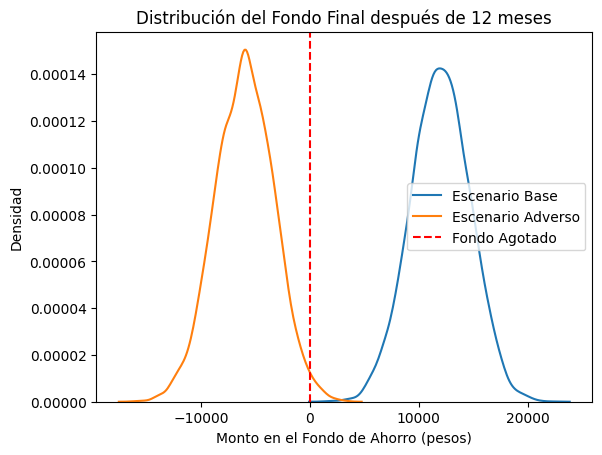

In [ ]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Definir ingresos y gastos mensuales promedio y su desviación estándar (puedes ajustarlos)
ingresos_mensuales = 5000  # ejemplo en pesos
gastos_mensuales_base = 4000
gastos_mensuales_adverso = 5500
desviacion_ingresos = 500
desviacion_gastos = 600

# Configurar la cantidad de simulaciones y el tiempo en meses
simulaciones = 10000
meses = 12

# Crear listas para almacenar los resultados
fondo_final_base = []
fondo_final_adverso = []

# Simulación de Montecarlo
for _ in range(simulaciones):
    fondo_base, fondo_adverso = 0, 0

    for _ in range(meses):
        ingresos = np.random.normal(ingresos_mensuales, desviacion_ingresos)
        gastos_base = np.random.normal(gastos_mensuales_base, desviacion_gastos)
        gastos_adverso = np.random.normal(gastos_mensuales_adverso, desviacion_gastos)

        fondo_base += ingresos - gastos_base
        fondo_adverso += ingresos - gastos_adverso

    fondo_final_base.append(fondo_base)
    fondo_final_adverso.append(fondo_adverso)

# Visualización de los resultados
sns.kdeplot(fondo_final_base, label="Escenario Base")
sns.kdeplot(fondo_final_adverso, label="Escenario Adverso")
plt.axvline(0, color='red', linestyle='--', label="Fondo Agotado")
plt.title("Distribución del Fondo Final después de 12 meses")
plt.xlabel("Monto en el Fondo de Ahorro (pesos)")
plt.ylabel("Densidad")
plt.legend()
plt.show()
